# Proyek Machine Learning Terapan Pertama
*   Nama    : Akh. Faris Farhan Zaima
*   SIB ID : M302X0784
*   Email  : m302x0784@dicoding.org

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler


#Data Load

In [ ]:
#Load dataset
data = pd.read_csv('Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


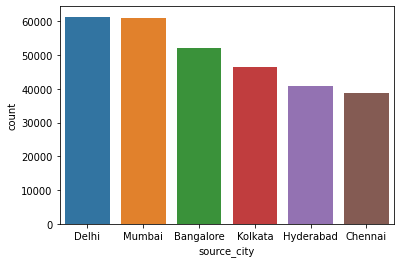

In [ ]:
#countplot source city
sns.countplot(data.source_city)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


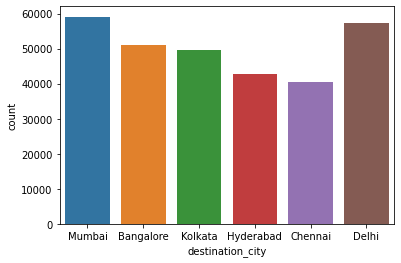

In [ ]:
#countplot destination city
sns.countplot(data.destination_city	)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


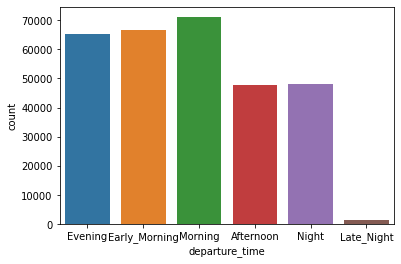

In [ ]:
#countplot departure time
sns.countplot(data.departure_time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


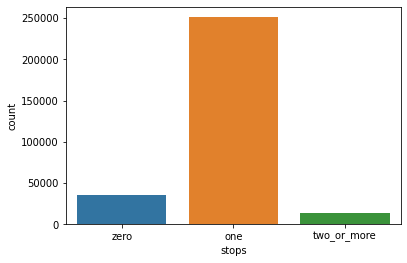

In [ ]:
#countplot stop(perhentian)
sns.countplot(data.stops)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


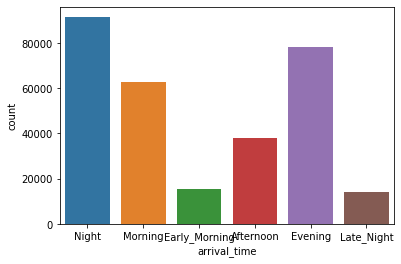

In [ ]:
#countplot arrivel time
sns.countplot(data.arrival_time)

Dari semua data yang categorical, tidak ditemukan adanya kejanggalan data.

In [ ]:
#bentuk data
data.shape

(300153, 12)

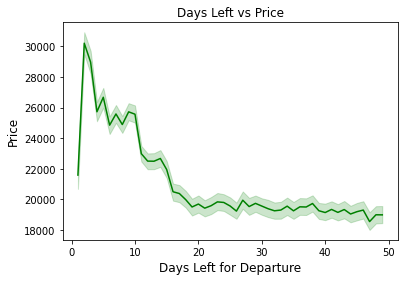

In [ ]:
#Visualisasi days left terhadap price
sns.lineplot(data=data,x='days_left',y='price',color='green')
plt.title('Days Left vs Price',fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

Text(0, 0.5, 'Count')

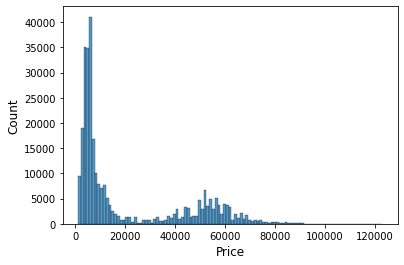

In [ ]:
#Visuasliasi price
sns.histplot(x = 'price', data = data)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Count',fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


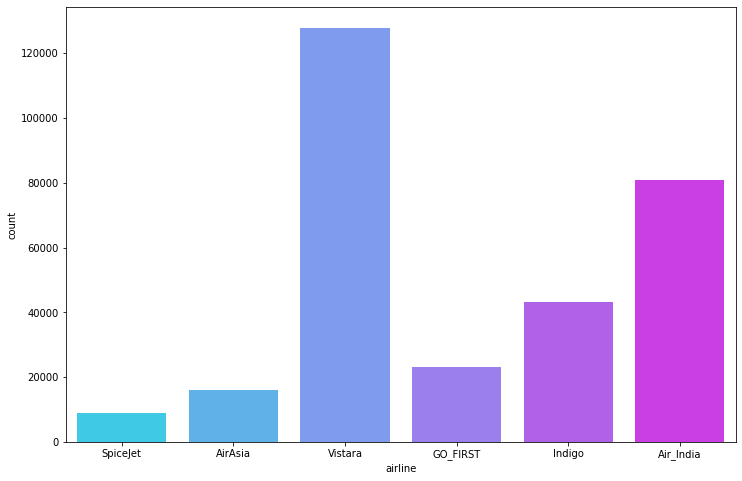

In [ ]:
#Visualisasi price dengan airlines
plt.figure(figsize=(12,8))
sns.countplot(data.airline, palette='cool');

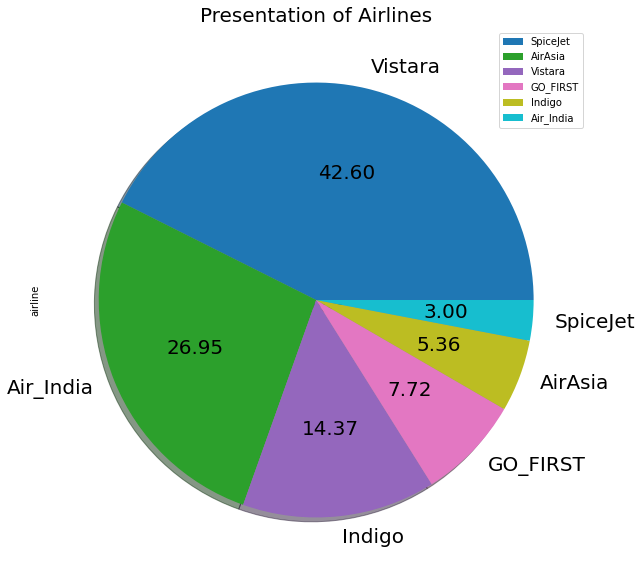

In [ ]:
#Visualisasi data airlines dengan pie
plt.figure(figsize=(12,10))
data['airline'].value_counts().plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='tab10', shadow=True)
plt.title('Presentation of Airlines',fontsize=20)
plt.legend(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo','Air_India'])
plt.show()

#Exploratory Data Analysis
##Deskripsi Variabel

In [ ]:
#Menampilkan informasi tentang tipe data pada fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
#Melihat informasi jumlah, mean, dll dari fungsi describe
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


##Menangani Missing Value
###NaN value

In [ ]:
#Cek Nan dan Hapus
data.isna().sum()
data=data.dropna()
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


###Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


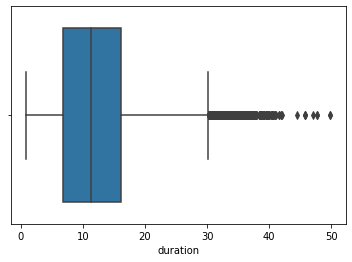

In [ ]:
#cek outlier
sns.boxplot(data.duration)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


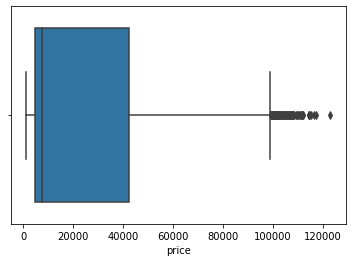

In [ ]:
#Boxplot data numerik harga
sns.boxplot(data.price)

In [ ]:
#Metode IQR untuk melakukan drop data outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(297920, 12)

In [ ]:
#drop column yang tidak dibutuhkan
data=data.drop(['Unnamed: 0','flight','class'],axis=1)
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,10.00,49,81585


##Univariate Analysis

In [ ]:
#Definisi feature
numerical_features = ['duration','days_left','price']
categorical_features = ['airline','source_city','departure_time','stops','arrival_time','destination_city']

##Multivariate Analysis

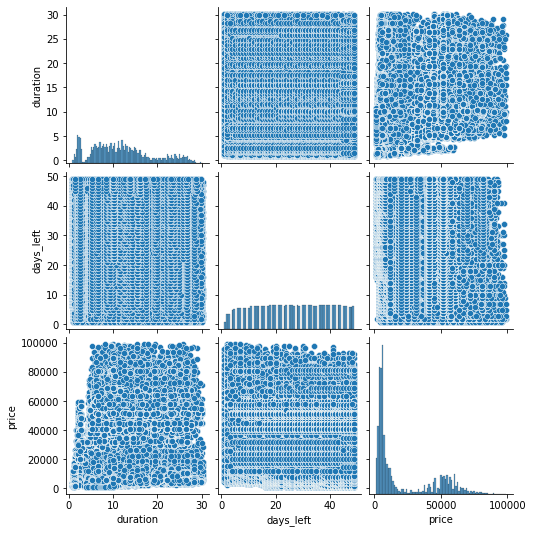

In [ ]:
#Pairplot untuk melihat hubungan antar fitur
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9a7ea190>,
      dtype=object)

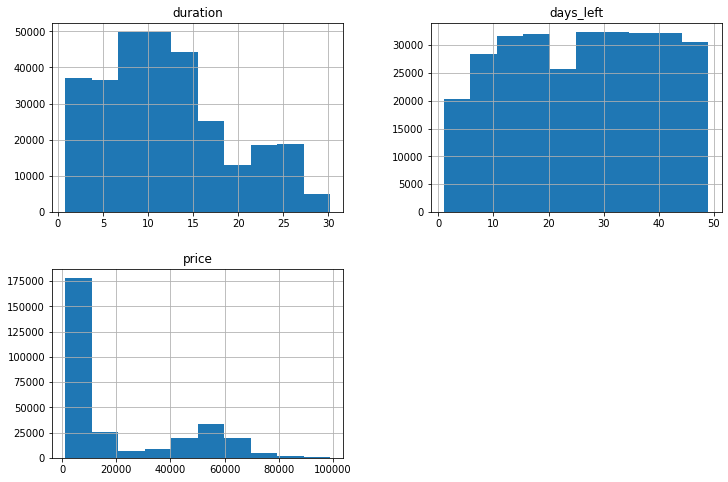

In [ ]:
#Histogram untuk melihat hubungan antar fitur
data.hist(figsize=(12,8))

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

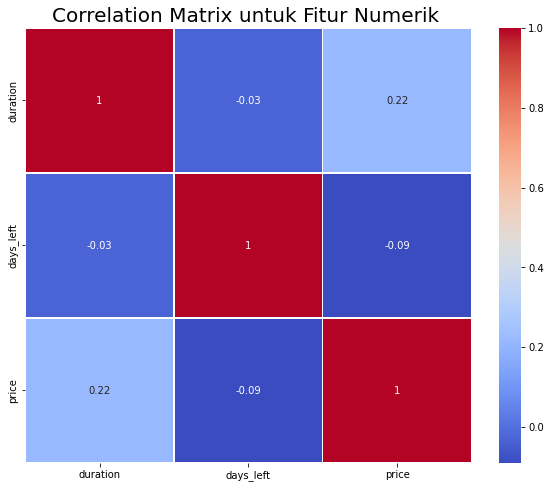

In [ ]:
#Correlation untuk melihat hubungan antar fitur

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
#Fungsi Corelation
data.corr()

,duration,days_left,price
duration,1.000000,-0.033880,0.215252
days_left,-0.033880,1.000000,-0.090813
price,0.215252,-0.090813,1.000000


#Data Preparation
##LabelEncoder

In [ ]:
#Encoder unutk mengubah data label menjadi numerk
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["airline"] = le.fit_transform(data["airline"])
data["source_city"] = le.fit_transform(data["source_city"])
data["departure_time"] = le.fit_transform(data["departure_time"])
data["stops"] = le.fit_transform(data["stops"])
data["arrival_time"] = le.fit_transform(data["arrival_time"])
data["destination_city"] = le.fit_transform(data["destination_city"])
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,4,2,2,2,5,5,2.17,1,5953
1,4,2,1,2,4,5,2.33,1,5953
2,0,2,1,2,1,5,2.17,1,5956
3,5,2,4,2,0,5,2.25,1,5955
4,5,2,4,2,4,5,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,10.08,49,69265
300149,5,1,0,0,5,3,10.42,49,77105
300150,5,1,1,0,5,3,13.83,49,79099
300151,5,1,1,0,2,3,10.00,49,81585


##Split Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
 
X = data.drop(["price"],axis =1)
y = data["price"]
#Membagi dataset dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state = 42)

##Standard Scaller

In [ ]:
 #SCaller utnuk mengubah data dalam skala mendekati distribusi normal
scaler = StandardScaler()
numerical_features = ['duration','days_left']
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,duration,days_left
216113,-0.772209,-1.478718
71355,-1.535571,-1.183663
287779,-0.057452,-1.552482
115819,1.788052,-1.552482
117320,-0.499172,-0.224735


#Model Development

In [ ]:
#Definisi models sebagai array
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 #KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#RF
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)       

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

#Evaluation Model

In [ ]:
# Scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,321010.03323,391874.360483
RF,304105.211741,373650.593225
Boosting,389021.837711,391432.621488


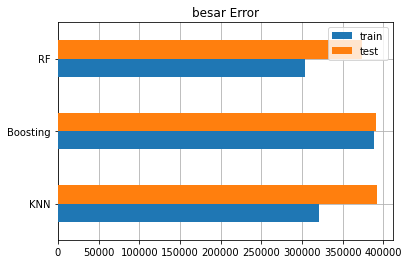

In [ ]:
#Visualisasi besar Error
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
plt.title("besar Error")
ax.grid(zorder=0)

In [ ]:
#Hasil prediksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
39649,7426,5402.3,4859.4,4577.9
